In [31]:
# Based on Bayes algorithm
# https://towardsdatascience.com/spam-classifier-in-python-from-scratch-27a98ddd8e73
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log,sqrt
import pandas as pd
%matplotlib inline
import os

# creating raw data
raw_data = {'v1': ['ham', 'ham', 'spam', 'ham', 'ham'], 
        'v2': ['Did you catch the bus ? Are you frying an egg ? Did you make a tea? Are you eating your mom\'s left over dinner ? Do you feel my ',
               'Great! I hope you like your man well endowed. I am  &lt;#&gt;  inches...',
               '07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please ',
               'Do you know what Mallika Sherawat did yesterday? Find out now @  &lt;URL&gt;',
               'Your gonna have to pick up a $1 burger for yourself on your way home. I can\'t even move. Pain is killing me.'], 
        'Unnamed: 2': ['NaN','NaN','NaN','NaN','NaN'], 
        'Unnamed: 3': ['NaN','NaN','NaN','NaN','NaN'],
        'Unnamed: 4': ['NaN','NaN','NaN','NaN','NaN']}
# load the data
df = pd.DataFrame(raw_data, columns = ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.to_csv('spam.csv')
#m = pd.read_csv('spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,Did you catch the bus ? Are you frying an egg ...,NaN,NaN,NaN
1,ham,Great! I hope you like your man well endowed. ...,NaN,NaN,NaN
2,spam,07732584351 - Rodger Burns - MSG = We tried to...,NaN,NaN,NaN
3,ham,Do you know what Mallika Sherawat did yesterda...,NaN,NaN,NaN
4,ham,Your gonna have to pick up a $1 burger for you...,NaN,NaN,NaN


In [44]:
# split data into train set and test set, 75% as train
import numpy as np
totalMails = df['v2'].shape[0]
trainIndex,testIndex = list(),list()
for i in range(df.shape[0]):
    if np.random.uniform(0,1) < 0.75:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = df.loc[trainIndex]
testData = df.loc[testIndex]

In [45]:
# dropping row from train set
trainData.reset_index(inplace=True)
trainData.drop(['index'],axis=1,inplace=True)
trainData.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,Did you catch the bus ? Are you frying an egg ...,NaN,NaN,NaN
1,spam,07732584351 - Rodger Burns - MSG = We tried to...,NaN,NaN,NaN
2,ham,Do you know what Mallika Sherawat did yesterda...,NaN,NaN,NaN
3,ham,Your gonna have to pick up a $1 burger for you...,NaN,NaN,NaN


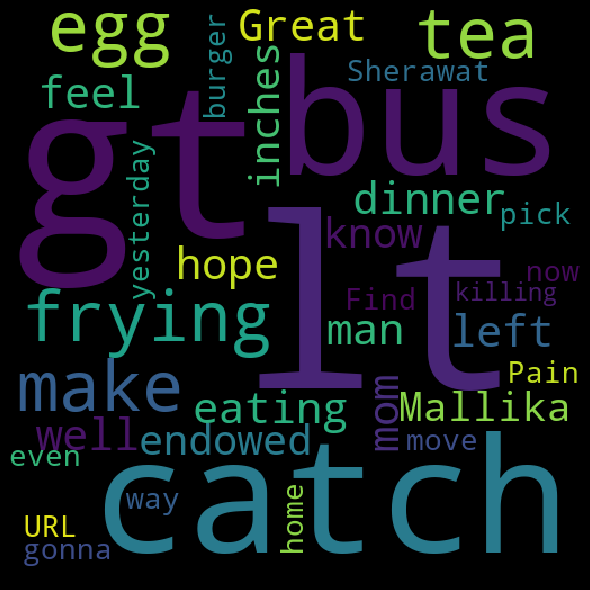

In [48]:
# visualize data
spam_list = ' '.join(list(df[df['v1'] == 'ham']['v2']))
spam_wc = WordCloud(width=512,height=512).generate(spam_list)
plt.figure(figsize= (10,8), facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [50]:
# training the model via preprocessing
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    return words
#TODO: Bag of Words
#TODO: TF-IDF or Term Frequency-Inverse Document Frequency
#TODO: Additive Smoothing

In [51]:
# classification of preprocessed messages
sc_tf_idf = SpamClassifier(trainData,'tf-idf')

NameError: name 'SpamClassifier' is not defined